# Decision Trees Regression

We will use the drinks data (which we used in weeks 1 & 2) again.

In [25]:
# import pandas, sklearn.tree, sklearn.grid_search

import pandas
import sklearn.tree
import sklearn.grid_search

In [26]:
# load the data from data/drinks.csv into a dataframe.
drinks = pandas.read_csv('../../data/drinks.csv')
drinks

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF
5,Antigua & Barbuda,102,128,45,4.9,NaN
6,Argentina,193,25,221,8.3,SA
7,Armenia,21,179,11,3.8,EU
8,Australia,261,72,212,10.4,OC
9,Austria,279,75,191,9.7,EU


In [27]:
# Confirm that there are 6 different continents ['AS', 'NA', 'EU', 'AF', 'SA', 'OC']
drinks.continent.value_counts(dropna=False)
drinks.continent.fillna(value='NA', inplace=True)
drinks.continent.value_counts(dropna=False)

AF    53
EU    45
AS    44
NA    23
OC    16
SA    12
Name: continent, dtype: int64

In [28]:
# Add columns for each of these continents
#OneHotEncoding Section of the presentation
import numpy
for continent in set(drinks.continent):
    drinks[continent] =  numpy.where(drinks.continent == continent,1,0)
drinks

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent,AF,NA,OC,AS,EU,SA
0,Afghanistan,0,0,0,0.0,AS,0,0,0,1,0,0
1,Albania,89,132,54,4.9,EU,0,0,0,0,1,0
2,Algeria,25,0,14,0.7,AF,1,0,0,0,0,0
3,Andorra,245,138,312,12.4,EU,0,0,0,0,1,0
4,Angola,217,57,45,5.9,AF,1,0,0,0,0,0
5,Antigua & Barbuda,102,128,45,4.9,NA,0,1,0,0,0,0
6,Argentina,193,25,221,8.3,SA,0,0,0,0,0,1
7,Armenia,21,179,11,3.8,EU,0,0,0,0,1,0
8,Australia,261,72,212,10.4,OC,0,0,1,0,0,0
9,Austria,279,75,191,9.7,EU,0,0,0,0,1,0


In [29]:
# Create a decision tree regressor
decisiontree_regressor = sklearn.tree.DecisionTreeRegressor()

In [15]:
# Create a brute force tool with GridSearchCV
brute_force = sklearn.grid_search.GridSearchCV(decisiontree_regressor,
                                               {'max_depth': range(1,10)},
                                               cv=6,
                                               scoring='mean_squared_error'
                                                
)

In [30]:
# Use the continents, spirit servings and beer servings
# as the dependent variables
X = drinks[['AF','EU','AS','NA','OC','SA','spirit_servings','beer_servings']]
X

,AF,EU,AS,NA,OC,SA,spirit_servings,beer_servings
0,0,0,1,0,0,0,0,0
1,0,1,0,0,0,0,132,89
2,1,0,0,0,0,0,0,25
3,0,1,0,0,0,0,138,245
4,1,0,0,0,0,0,57,217
5,0,0,0,1,0,0,128,102
6,0,0,0,0,0,1,25,193
7,0,1,0,0,0,0,179,21
8,0,0,0,0,1,0,72,261
9,0,1,0,0,0,0,75,279


In [31]:
# Try to predict the number of wine servings
y = drinks.wine_servings
brute_force.fit(X,y)

GridSearchCV(cv=6, error_score='raise',
       estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9]},
       pre_dispatch='2*n_jobs', refit=True, scoring='mean_squared_error',
       verbose=0)

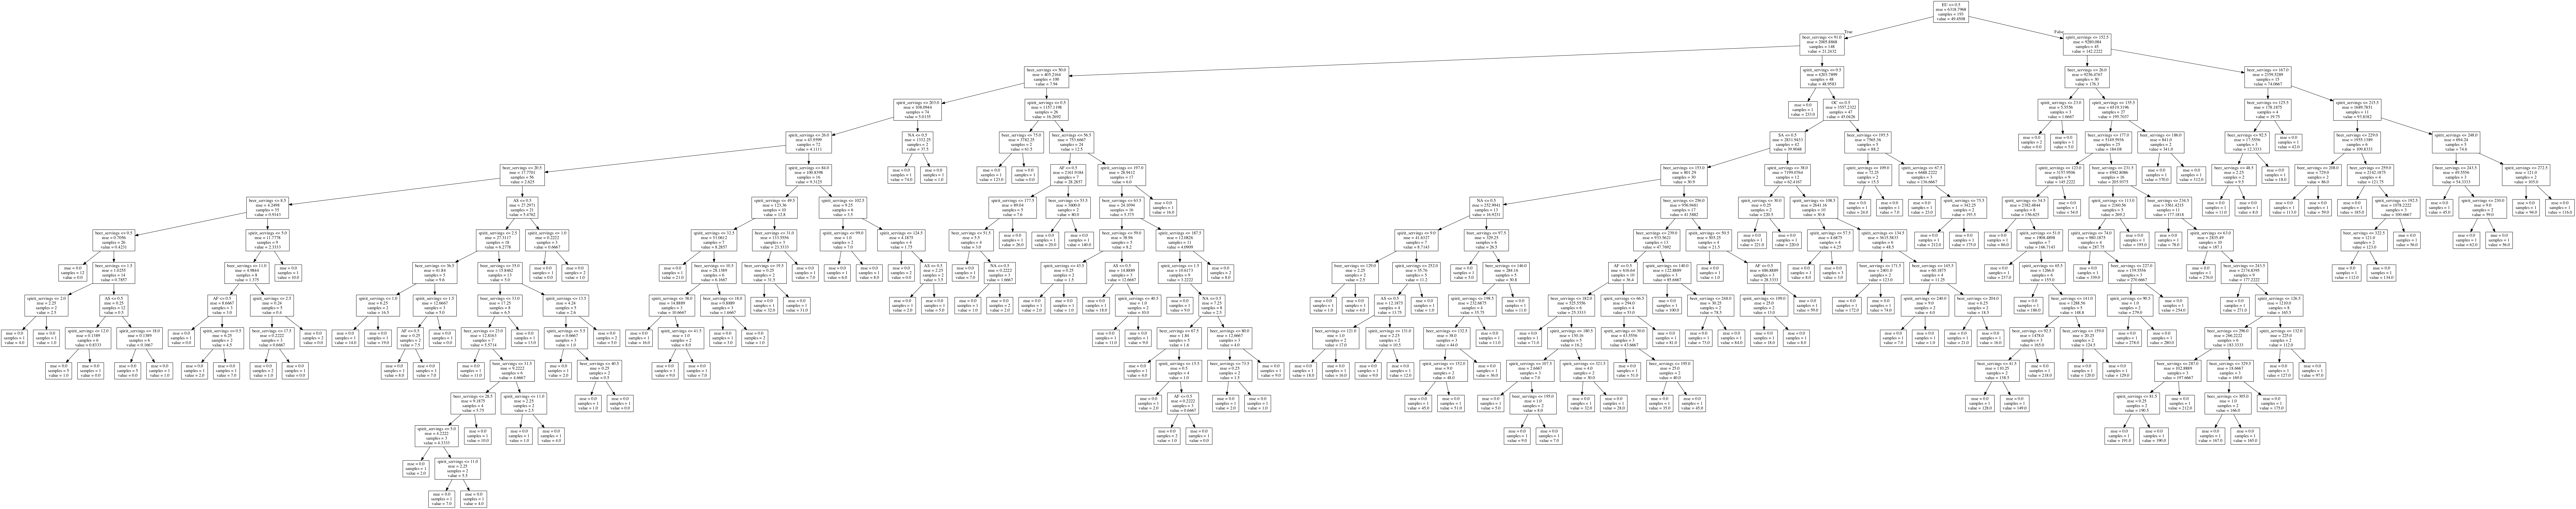

In [32]:
# If graphviz is set up and working for you, what does the
# decision tree look like?

brute_force.best_params_

decisiontree_regressor.fit(X, y)

import StringIO
import sklearn.tree
import IPython.display
import pydot

File_obj = StringIO.StringIO()
sklearn.tree.export_graphviz(decisiontree_regressor, out_file=File_obj, 
                             feature_names=['AF','EU','AS','NA','OC','SA','spirit_servings','beer_servings'])
Graph = pydot.graph_from_dot_data(File_obj.getvalue())
IPython.display.Image(Graph.create_png())

In [44]:
# What are the most important features for predicting wine?
decisiontree_regressor.feature_importances_
for r in decisiontree_regressor.feature_importances_:
    print "%.2f" % (r*100,)

0.88
41.41
0.01
0.30
0.85
0.70
29.37
26.47


In [51]:
# Try some sample numbers, example how good the prediction is, etc.
decisiontree_regressor.predict([0,1,0,0,0,0,170,18])

/Users/samuelbolivar/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


array([ 11.])

In [48]:
drinks[drinks.continent == 'EU']

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent,AF,NA,OC,AS,EU,SA
1,Albania,89,132,54,4.9,EU,0,0,0,0,1,0
3,Andorra,245,138,312,12.4,EU,0,0,0,0,1,0
7,Armenia,21,179,11,3.8,EU,0,0,0,0,1,0
9,Austria,279,75,191,9.7,EU,0,0,0,0,1,0
10,Azerbaijan,21,46,5,1.3,EU,0,0,0,0,1,0
15,Belarus,142,373,42,14.4,EU,0,0,0,0,1,0
16,Belgium,295,84,212,10.5,EU,0,0,0,0,1,0
21,Bosnia-Herzegovina,76,173,8,4.6,EU,0,0,0,0,1,0
25,Bulgaria,231,252,94,10.3,EU,0,0,0,0,1,0
42,Croatia,230,87,254,10.2,EU,0,0,0,0,1,0
